# Load from canonical restaurant data

In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
# from sklearn.preprocessing import StandardScaler, Imputer, FunctionTransformer, LabelBinarizer
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.linear_model import LogisticRegression, SGDClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
files = [f for f in listdir('./') if '.csv' in f]
files

['test_df_block13_open26.csv',
 'test_df_block13_open52.csv',
 'test_df_block13_open78.csv',
 'test_df_block26_open26.csv',
 'test_df_block26_open52.csv',
 'test_df_block26_open78.csv',
 'test_df_block52_open26.csv',
 'test_df_block52_open52.csv',
 'test_df_block52_open78.csv',
 'train_df_block13_open26.csv',
 'train_df_block13_open52.csv',
 'train_df_block13_open78.csv',
 'train_df_block26_open26.csv',
 'train_df_block26_open52.csv',
 'train_df_block26_open78.csv',
 'train_df_block52_open26.csv',
 'train_df_block52_open52.csv',
 'train_df_block52_open78.csv']

In [3]:
train_df_block13_open26 = pd.read_csv('./train_df_block13_open26.csv')
test_df_block13_open26 = pd.read_csv('./test_df_block13_open26.csv')

In [4]:
total_df = train_df_block13_open26.append(test_df_block13_open26, ignore_index=True)

In [5]:
for i, c in enumerate(total_df.columns):
    print(i, c + ': ', total_df[c].isnull().sum())

0 id:  0
1 name:  0
2 Claimed?:  0
3 HasWebsite:  0
4 first_review:  0
5 last_review:  0
6 permanently_closed:  0
7 1_star:  0
8 2_star:  0
9 3_star:  0
10 4_star:  0
11 5_star:  0
12 AvgLast_compound:  99
13 AvgLast_star:  99
14 AvgLast_subjectivity:  99
15 Last_compound_coef:  0
16 Last_compound_intrcpt:  99
17 Last_star_coef:  0
18 Last_star_intrcpt:  99
19 Last_subjectivity_coef:  0
20 Last_subjectivity_intrcpt:  99
21 avg_reviews:  21
22 avg_star:  21
23 Brazilian:  0
24 Creperies:  0
25 Sandwiches:  0
26 Breakfast & Brunch:  0
27 Mexican:  0
28 Tex-Mex:  0
29 Pubs:  0
30 American (Traditional):  0
31 Seafood:  0
32 Modern European:  0
33 American (New):  0
34 Mediterranean:  0
35 Cuban:  0
36 Smokehouse:  0
37 Tapas Bars:  0
38 Restaurants:  0
39 Pizza:  0
40 Italian:  0
41 Greek:  0
42 Moroccan:  0
43 Bars:  0
44 Coffee & Tea:  0
45 Thai:  0
46 Sushi Bars:  0
47 Diners:  0
48 Juice Bars & Smoothies:  0
49 Indian:  0
50 Pakistani:  0
51 Japanese:  0
52 Lounges:  0
53 Caterers:  0

# Baseline in whole data set

In [6]:
closed = total_df[total_df['permanently_closed'] == 1].copy()
opened = total_df[total_df['permanently_closed'] == 0].copy()

In [7]:
closed.shape

(303, 228)

In [8]:
opened.shape

(849, 228)

In [113]:
849/(303+849)

0.7369791666666666

# Baseline in test set

In [9]:
test_df_block13_open26[test_df_block13_open26['permanently_closed'] == 1].shape

(78, 228)

In [10]:
test_df_block13_open26[test_df_block13_open26['permanently_closed'] == 0].shape

(210, 228)

In [11]:
210/(210+78)

0.7291666666666666

# Prcie range distribution for closed and open restaurants in training set

In [96]:
print('\t\tclosed\t' + 'opened')
for price_range in ['Under $10', '$11-30', '$31-60', 'Above $61', 'Inexpensive', 'Moderate', 'Pricey']:
    print(price_range+': \t', closed[price_range].sum(), '\t', opened[price_range].sum())

		closed	opened
Under $10: 	 23 	 239
$11-30: 	 167 	 481
$31-60: 	 76 	 82
Above $61: 	 12 	 17
Inexpensive: 	 4 	 2
Moderate: 	 11 	 9
Pricey: 	 2 	 2


# Top 10 categories in closed restaurants

In [97]:
closed.iloc[:,23:149].sum().sort_values(ascending=False)[:10]

American (New)            79
Bars                      66
Italian                   42
Breakfast & Brunch        23
American (Traditional)    22
French                    18
Sushi Bars                18
Japanese                  16
Pizza                     15
Mexican                   15
dtype: int64

# Top 10 categories in open restaurants

In [98]:
opened.iloc[:,23:149].sum().sort_values(ascending=False)[:10]

Bars                      164
Breakfast & Brunch        121
American (Traditional)    113
Italian                    88
Sandwiches                 85
American (New)             83
Mexican                    80
Pizza                      65
Burgers                    56
Steakhouses                44
dtype: int64

# Top 10 neighborhoods in closed restaurants

In [99]:
closed.iloc[:,149:200].sum().sort_values(ascending=False)[:10]

Near North Side    80
Lakeview           40
West Town          37
Lincoln Park       30
River North        27
Wicker Park        24
Near West Side     22
West Loop          21
DePaul             19
Logan Square       12
dtype: int64

In [15]:
NH_closed = closed.iloc[:,149:200].sum().sort_values(ascending=False)[:10]

80

# Top 10 neighborhoods in open restaurants

In [100]:
opened.iloc[:,149:200].sum().sort_values(ascending=False)[:10]

Near North Side    151
West Town          103
Lakeview            85
Lincoln Park        83
Near West Side      66
West Loop           55
The Loop            52
Wicker Park         42
Edgewater           42
DePaul              42
dtype: int64

In [16]:
NH_open = opened.iloc[:,149:200].sum().sort_values(ascending=False)[:10]

In [24]:
NH = list(set(list(NH_closed.index) + list(NH_open.index)))
len(NH)

12

In [42]:
NH

['Wicker Park',
 'Near North Side',
 'The Loop',
 'Logan Square',
 'Lakeview',
 'West Loop',
 'River North',
 'West Town',
 'Edgewater',
 'Near West Side',
 'Lincoln Park',
 'DePaul']

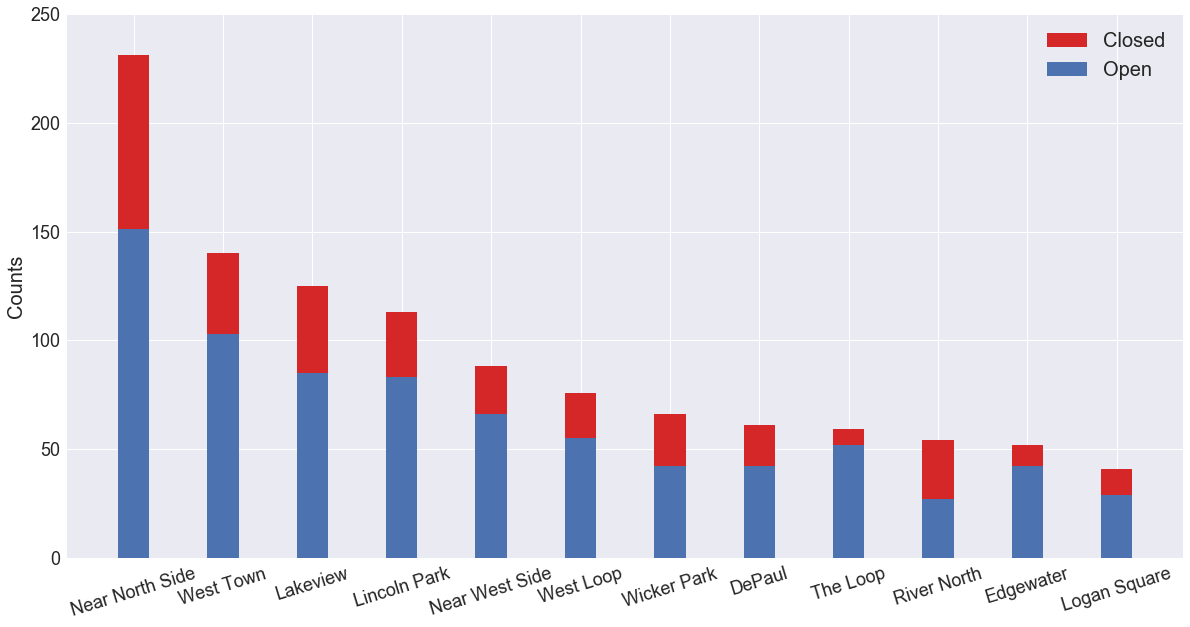

In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

number_NH = len(NH)
Dict = {'NH':NH, 'Open':[], 'Closed':[], 'Total':[]}

for N in NH:
    Dict['Open'].append(opened[N].sum()) 
    Dict['Closed'].append(closed[N].sum())
    Dict['Total'].append(opened[N].sum()+closed[N].sum())
Dist = pd.DataFrame(Dict).sort_values(by='Total', ascending=False)

ind = np.arange(len(NH))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(20,10))
p1 = plt.bar(ind, list(Dist['Closed']), width, color='#d62728', bottom=list(Dist['Open']))
p2 = plt.bar(ind, list(Dist['Open']), width)

plt.ylabel('Counts', fontsize=20)
plt.xticks(ind, list(Dist['NH']), fontsize=18, rotation=17)
plt.yticks(np.arange(0, 251, 50), fontsize=18)
plt.legend((p1[0], p2[0]), ('Closed', 'Open'), fontsize=20)
plt.savefig('NH.jpg')

In [101]:
wanted = [
'Claimed?',
'HasWebsite',
'1_star',
'2_star',
'3_star',
'4_star',
'5_star',
'AvgLast_compound',
'AvgLast_star',
'AvgLast_subjectivity',
'Last_compound_coef',
'Last_compound_intrcpt',
'Last_star_coef',
'Last_star_intrcpt',
'Last_subjectivity_coef',
'Last_subjectivity_intrcpt',
'avg_reviews',
'avg_star', 
'Under $10', 
'$11-30', 
'$31-60', 
'Above $61', 
'Inexpensive',
'Moderate', 
'Pricey'
]

In [102]:
select_df = total_df[wanted + ['permanently_closed']]

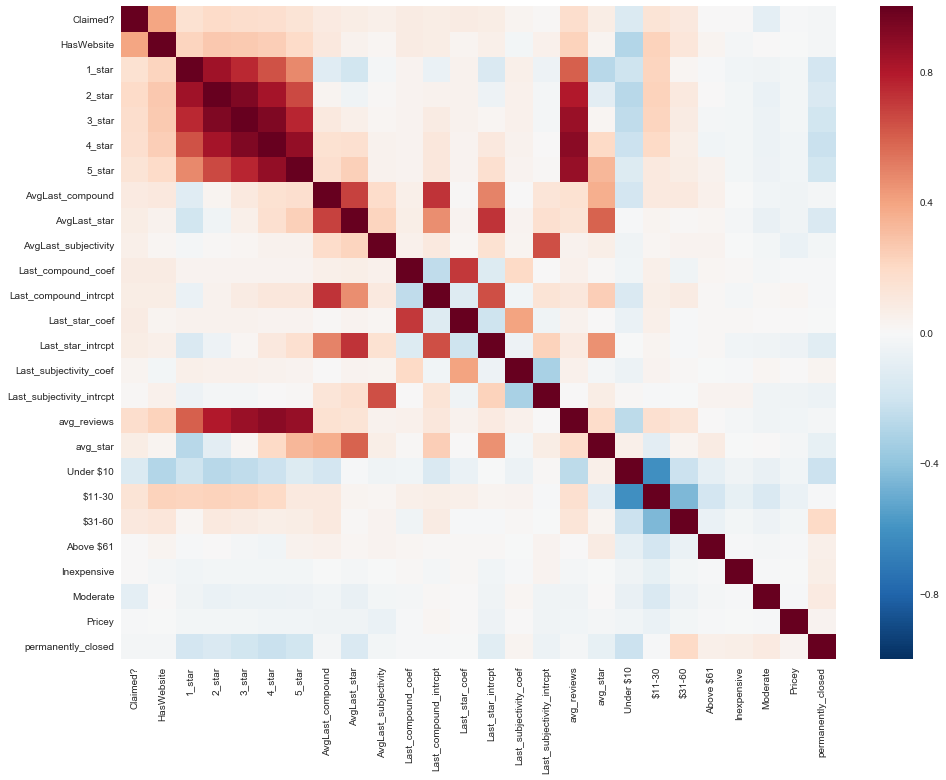

In [103]:
plt.figure(figsize=(16,12))
sns.heatmap(select_df.corr())